# ERDDAPY library

In the previous lesson, we downloaded our dataset file to our local machine. Now we will not download it to your local machine, but use in in your python environment directly. 

Erddapy is a package that helps create the ERDDAP URLs. You can create virtually any request like, searching for datasets, acquiring metadata, downloading data, etc.



## Create the URL

Step 1: Instantiate the ERDDAP URL constructor for a server ( erddapy server object). 

In [1]:
#Import erddap package into 
from erddapy import ERDDAP

# Initiate the ERDDAP URL constructor for a server. 
e = ERDDAP(
    server= "https://erddap.bco-dmo.org/erddap/",
    protocol="tabledap",
    response="csv",
)
print ("Initiation done")

Initiation done


Step 2: Populate the object with  a dataset id, variables of interest,  and its constraints. We can download the csvp response with the `.to_pandas` method.

In [2]:
e.dataset_id = "bcodmo_dataset_817952"

e.variables = [
    "Cruise",
    "latitude",
    "longitude",
    "Date_Time_PST",
    "Temperature",
    "Salinity",
    "PN",
    "POC",
    "time"
]

e.constraints = {
    "time>=": "2016-01-26T09:45Z",
    "time<=": "2016-12-07T04:40Z",
}

print ("setting variables done")

setting variables done


Check the full URL

In [3]:
# Print the URL - check
url = e.get_download_url()
print(url)

https://erddap.bco-dmo.org/erddap/tabledap/bcodmo_dataset_817952.csv?Cruise,latitude,longitude,Date_Time_PST,Temperature,Salinity,PN,POC,time&time>=1453801500.0&time<=1481085600.0


## Import into Python Pandas

Import the dataset into a pandas dataframe. Import the csvp response with the `.to_pandas` method.

In [44]:
# Convert URL to pandas dataframe
df = e.to_pandas(
    index_col="time (UTC)",
    parse_dates=True,
).dropna()

df.head()

,Cruise (unitless),latitude (degrees_north),longitude (degrees_east),Date_Time_PST (unitless),Temperature (degrees Celsius (\u00b0C)),Salinity (unitless),PN (micromoles N per liter of water (um/L)),POC (micromoles C per liter of water (um/L))
time (UTC),,,,,,,,
2016-12-07 04:27:00+00:00,OC1611B,44.6489,-124.1156,12/6/2016 20:27,12.34,30.71,0.73,6.46
2016-03-11 17:49:00+00:00,OC1603B,44.6500,-124.1002,3/11/2016 9:49,11.96,30.58,1.54,10.04
2016-03-11 18:40:00+00:00,OC1603B,44.6499,-124.1527,3/11/2016 10:40,11.86,29.79,2.38,19.43
2016-03-11 19:29:00+00:00,OC1603B,44.6503,-124.3399,3/11/2016 11:29,11.62,32.43,0.41,3.78
2016-03-11 20:07:00+00:00,OC1603B,44.6491,-124.4099,3/11/2016 12:07,11.62,32.43,0.51,3.63


Check the dataframe and start using it into your pythin environment

In [45]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113 entries, 2016-12-07 04:27:00+00:00 to 2016-01-26 14:16:00+00:00
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Cruise (unitless)                             113 non-null    object 
 1   latitude (degrees_north)                      113 non-null    float64
 2   longitude (degrees_east)                      113 non-null    float64
 3   Date_Time_PST (unitless)                      113 non-null    object 
 4   Temperature (degrees Celsius (\u00b0C))       113 non-null    float64
 5   Salinity (unitless)                           113 non-null    float64
 6   PN (micromoles N per liter of water (um/L))   113 non-null    float64
 7   POC (micromoles C per liter of water (um/L))  113 non-null    float64
dtypes: float64(6), object(2)
memory usage: 7.9+ KB
None


In [46]:
print (df.columns)

Index(['Cruise (unitless)', 'latitude (degrees_north)',
       'longitude (degrees_east)', 'Date_Time_PST (unitless)',
       'Temperature (degrees Celsius (\u00b0C))', 'Salinity (unitless)',
       'PN (micromoles N per liter of water (um/L))',
       'POC (micromoles C per liter of water (um/L))'],
      dtype='object')


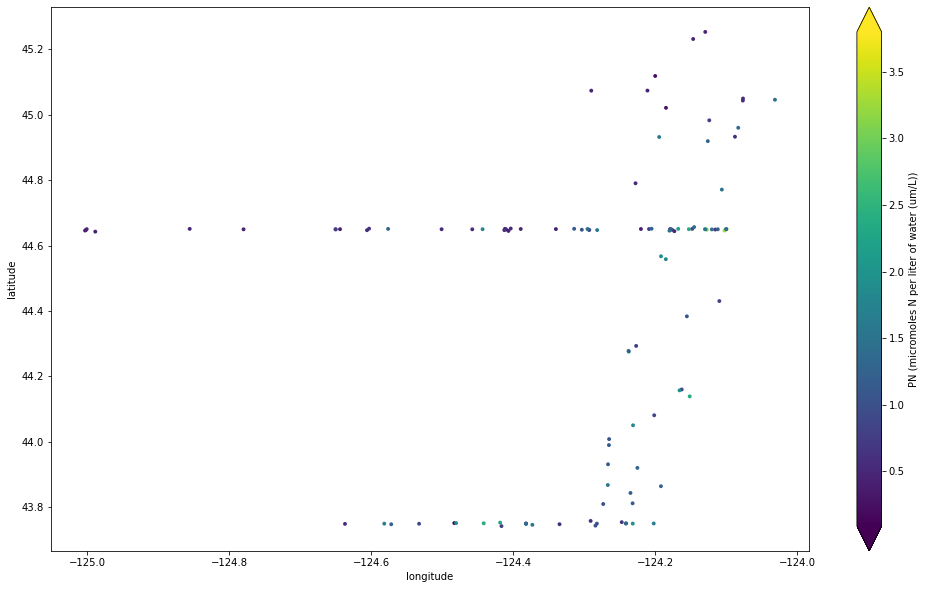

In [47]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(17, 10))
cs = ax.scatter(
    x=df["longitude (degrees_east)"],
    y=df["latitude (degrees_north)"],
    s=15,
    c=df["PN (micromoles N per liter of water (um/L))"],
    marker="o",
    edgecolor="none"
)

cbar = fig.colorbar(cs, orientation="vertical", extend="both")
cbar.ax.set_ylabel("PN (micromoles N per liter of water (um/L))")
ax.set_ylabel("latitude");
ax.set_xlabel("longitude");